# Спектры поглощения йода

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
from matplotlib.ticker import MultipleLocator
from scipy.stats import linregress

In [3]:
def get_spectrum(filename):
    import re
    df = pd.read_csv(filename, sep=' ').iloc[:,:2].copy()
    df = df.rename(index=str, columns={'Wavelength': 'Wavelength, nm', 'Trans': 'Transmittance, %'})
    df = df.iloc[1:,:].copy()
    df = df.astype('str', copy=True)
    df = df.apply(lambda s: [i.replace(',', '.') for i in s])
    df = df.astype('float', copy=True)
    return df.copy()

In [4]:
df40 = get_spectrum('40_480_655.dat')
df40.head()

,"Wavelength, nm","Transmittance, %"
1,480.0,38.818190
2,480.2,38.768393
3,480.4,38.986913
4,480.6,38.755428
5,480.8,39.367458


In [5]:
df55 = get_spectrum('55_480_655.dat')
df55.head()

,"Wavelength, nm","Transmittance, %"
1,480.0,37.777034
2,480.2,38.052229
3,480.4,37.309613
4,480.6,36.418609
5,480.8,35.891283


In [6]:
df70 = get_spectrum('70_480_655_01.dat')
df70.head()

,"Wavelength, nm","Transmittance, %"
1,480.0,29.374289
2,480.2,28.741954
3,480.4,28.015455
4,480.6,28.935649
5,480.8,29.009641


Найдем пики для $40^\circ C$, $55^\circ C$, $70^\circ C$

In [7]:
import matplotlib as mpl
font = {'family' : 'normal',
        'weight' : 'normal',
        'size' : 20}

mpl.rc('font', **font)

#### 40

c:\users\aleks\appdata\local\programs\python\python37\lib\site-packages\matplotlib\font_manager.py:1241: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


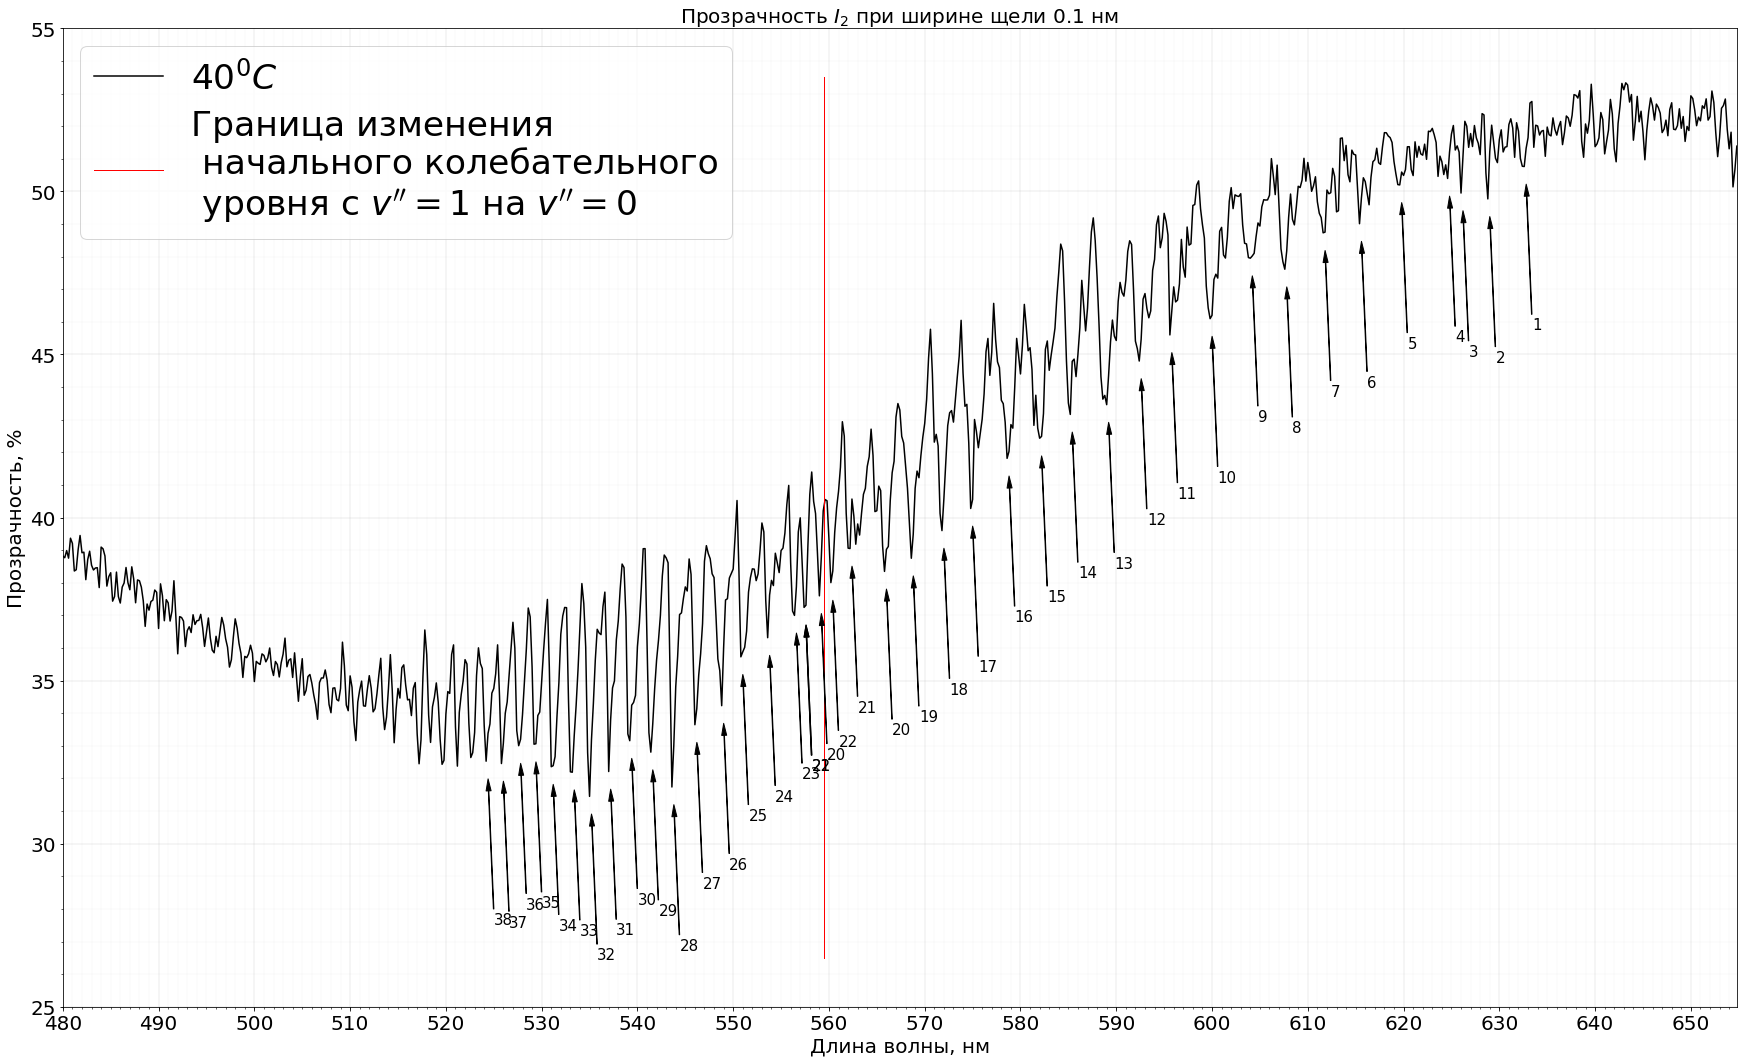

In [8]:
from scipy.signal import find_peaks
peaks, _ = find_peaks(-df40.iloc[:,1][:790], distance=4.5, width=0.4, prominence=1.4)
# Костыль 1
#peaks = np.append(peaks,395)
#peaks = np.append(peaks, 400)
# Костыль 2
peaks = np.append(peaks,387)
peaks = np.append(peaks,545)
peaks.sort()
peaks = peaks[10:].copy()
# Удалим плохие пики. ХАРДКОД
#peaks = np.delete(np.delete(np.delete(peaks, 20), 18), 27)
peaks = np.delete(peaks, 30)
peaks = np.delete(peaks, 29)
peaks = np.delete(peaks, 42)
#peaks = np.extract(peaks!=387, peaks)
peaks




fig = plt.figure()
ax = plt.subplot(111)
df40.plot(x='Wavelength, nm', y='Transmittance, %', ax=ax, label='40$^0C$', c='black')
ax.set_xlabel('Длина волны, нм', size=20)
ax.set_ylabel('Прозрачность, %', size=20)
ax.set_title("Прозрачность $I_2$ при ширине щели $0.1$ нм", size=20)
ax.axvline(x=559.5, linewidth=1, ymin=0.05, ymax=0.95, linestyle='-', color='r', label='Граница изменения \n начального колебательного\n уровня c $v^{\prime\prime}=1$ на $v^{\prime\prime}=0$')

xminorLocator = MultipleLocator(1)
yminorLocator = MultipleLocator(1)
xmajorLocator = MultipleLocator(10)
ymajorLocator = MultipleLocator(5)

ax.xaxis.set_minor_locator(xminorLocator)
ax.yaxis.set_minor_locator(yminorLocator)
ax.xaxis.set_major_locator(xmajorLocator)
ax.yaxis.set_major_locator(ymajorLocator)
ax.set_ylim(25,55)

plt.grid(which='major', ls='-', lw=0.1, c='grey')
plt.grid(which='minor', ls='--', lw=0.05, c='grey')
ax.legend(fontsize='xx-large')
j = 1
p = 0
peaks_len = len(peaks)
for i in range(1, peaks_len):
    if j>22 and p==0: 
        j = 20
        p = 1
    #print('{}: {}'.format(j, peaks_len - i))
    ax.annotate('%d'%j, xy=(df40.iloc[peaks[peaks_len-i],0]+.2, df40.iloc[peaks[peaks_len-i],1]-.5), 
                xytext=(df40.iloc[peaks[peaks_len-i],0]+0.8, df40.iloc[peaks[peaks_len-i],1]-5), size=15, 
                arrowprops=dict(facecolor='black', shrink=0.01, width=0.5, headwidth=5))
    j+=1

fig.set_size_inches(30, 18)
fig.savefig('40_grad.pdf', bbox_inches='tight', pad_inches=0)

#### 55

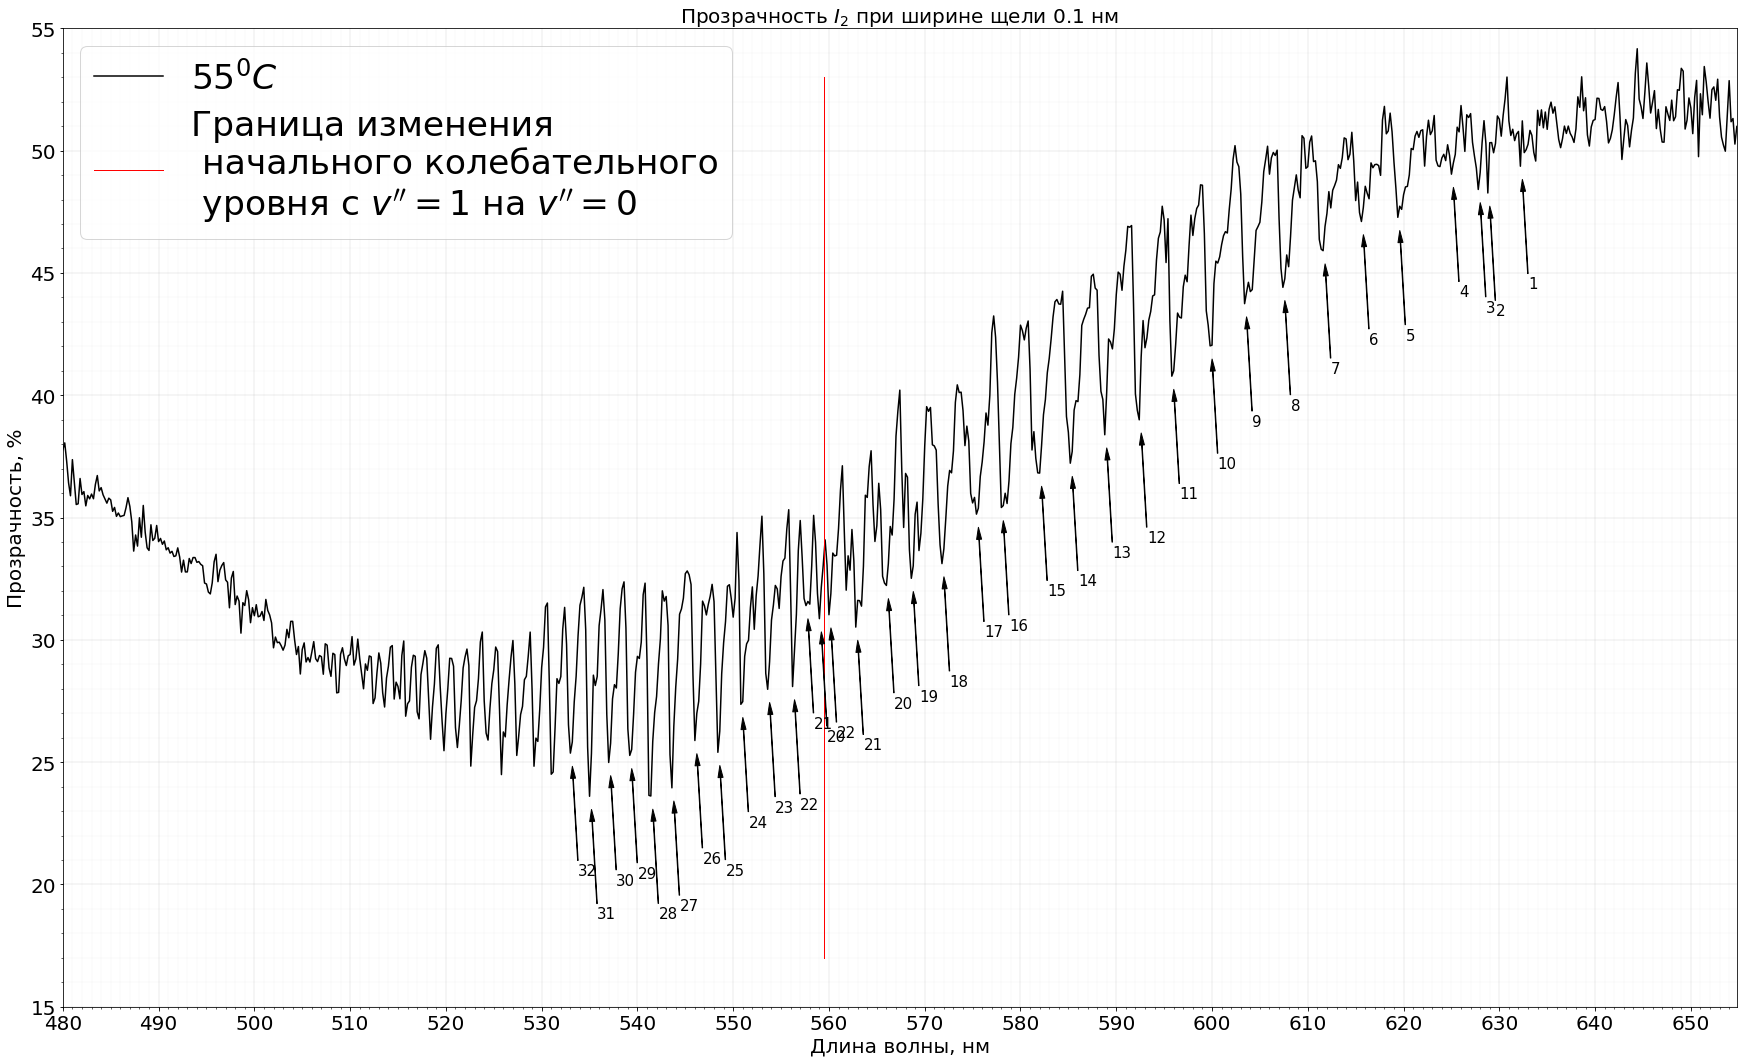

In [9]:
from scipy.signal import find_peaks
peaks, _ = find_peaks(-df55.iloc[:,1][:790], distance=4.5, width=0.4, prominence=2.5)
# Костыль 1
#peaks = np.append(peaks,395)
#peaks = np.append(peaks, 400)
# Костыль 2
#peaks = np.append(peaks,387)
#peaks = np.append(peaks,545)
peaks = np.append(peaks, 725)
peaks.sort()
peaks = peaks[10:].copy()
# Удалим плохие пики. ХАРДКОД
#peaks = np.delete(np.delete(np.delete(peaks, 20), 18), 27)
#peaks = np.delete(peaks, 30)
#peaks = np.delete(peaks, 29)
#peaks = np.delete(peaks, 42)
#peaks = np.extract(peaks!=387, peaks)
peaks




fig = plt.figure()
ax = plt.subplot(111)
df55.plot(x='Wavelength, nm', y='Transmittance, %', ax=ax, label='55$^0C$', c='black')
ax.set_xlabel('Длина волны, нм', size=20)
ax.set_ylabel('Прозрачность, %', size=20)
ax.set_title("Прозрачность $I_2$ при ширине щели $0.1$ нм", size=20)
ax.axvline(x=559.5, linewidth=1, ymin=0.05, ymax=0.95, linestyle='-', color='r', label='Граница изменения \n начального колебательного\n уровня c $v^{\prime\prime}=1$ на $v^{\prime\prime}=0$')

xminorLocator = MultipleLocator(1)
yminorLocator = MultipleLocator(1)
xmajorLocator = MultipleLocator(10)
ymajorLocator = MultipleLocator(5)

ax.xaxis.set_minor_locator(xminorLocator)
ax.yaxis.set_minor_locator(yminorLocator)
ax.xaxis.set_major_locator(xmajorLocator)
ax.yaxis.set_major_locator(ymajorLocator)
ax.set_ylim(15,55)

plt.grid(which='major', ls='-', lw=0.1, c='grey')
plt.grid(which='minor', ls='--', lw=0.05, c='grey')
ax.legend(fontsize='xx-large')
j = 1
p = 0
peaks_len = len(peaks)
for i in range(1, peaks_len):
    if j>22 and p==0: 
        j = 20
        p = 1
    #print('{}: {}'.format(j, peaks_len - i))
    ax.annotate('%d'%j, xy=(df55.iloc[peaks[peaks_len-i],0]+.2, df55.iloc[peaks[peaks_len-i],1]-.5), 
                xytext=(df55.iloc[peaks[peaks_len-i],0]+0.8, df55.iloc[peaks[peaks_len-i],1]-5), size=15, 
                arrowprops=dict(facecolor='black', shrink=0.01, width=0.5, headwidth=5))
    j+=1

fig.set_size_inches(30, 18)
fig.savefig('55_grad.pdf', bbox_inches='tight', pad_inches=0)

In [10]:
#df55.iloc[:,1][df55.iloc[:,0] > 623]

#### 70

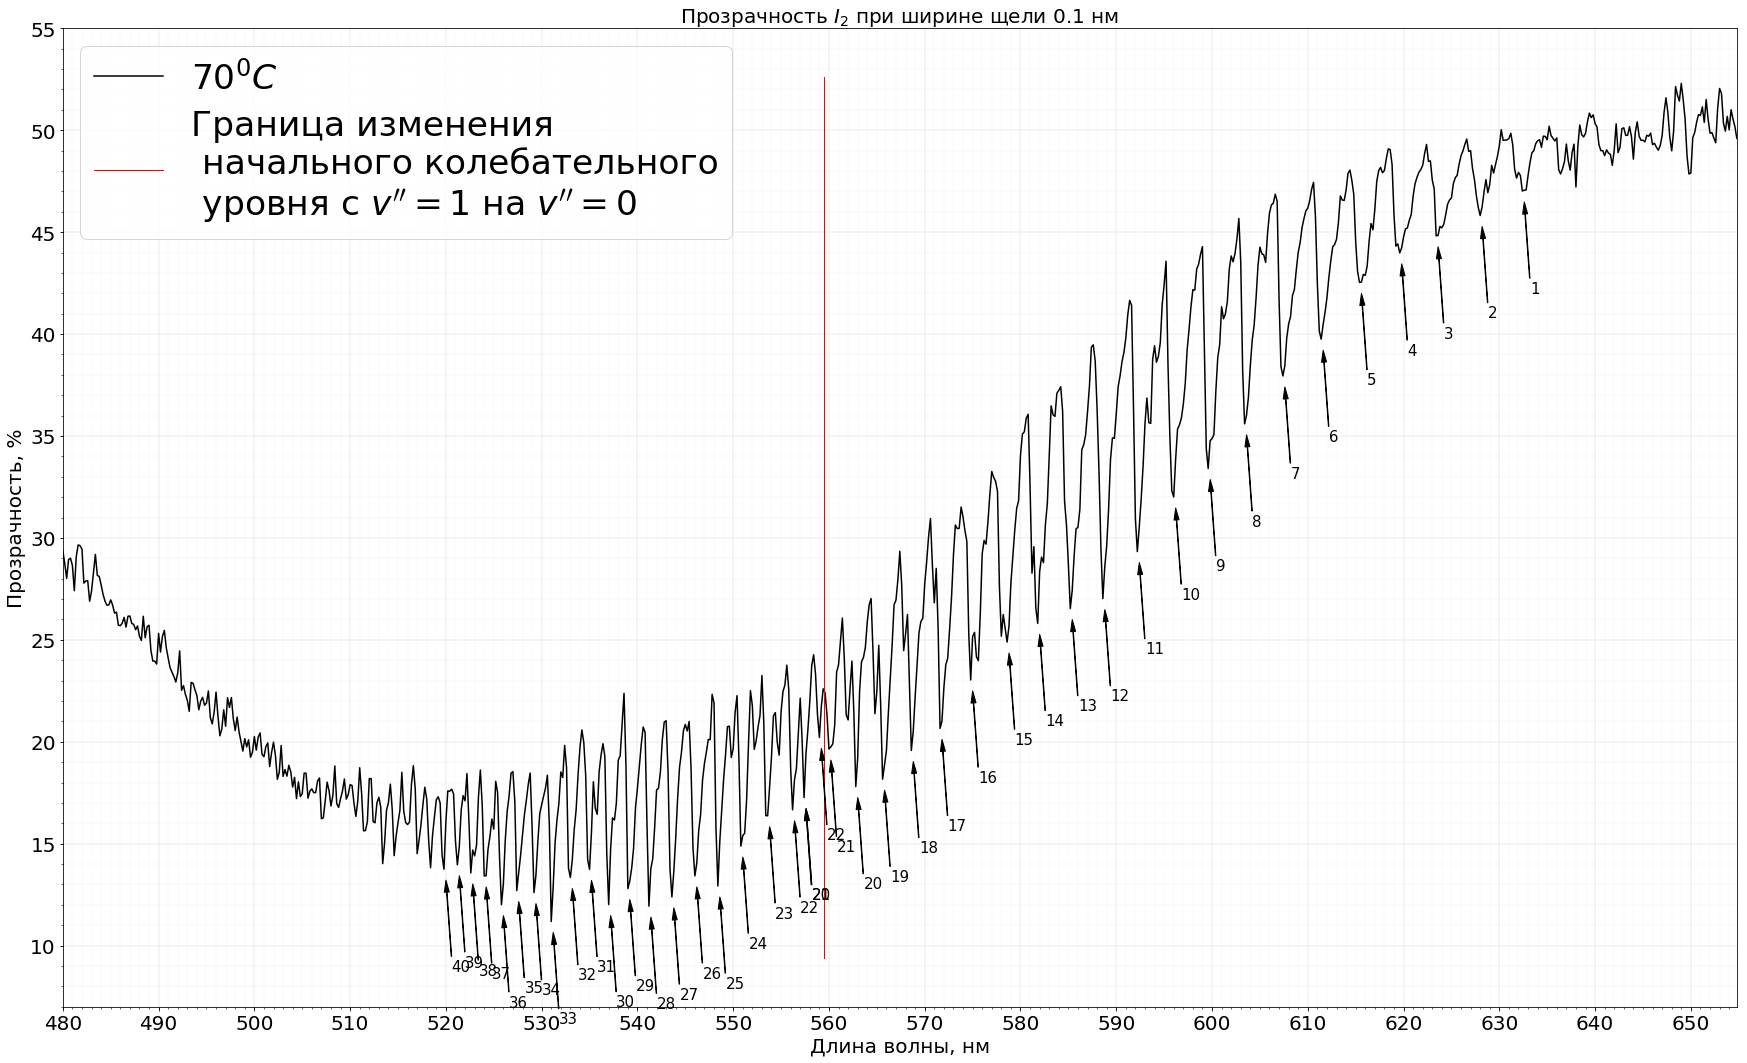

In [11]:
from scipy.signal import find_peaks
peaks, _ = find_peaks(-df70.iloc[:,1][:790], distance=5.5, width=0.4, prominence=1.6)
# Костыль 1
peaks = np.append(peaks,395)
# Костыль 2
peaks = np.append(peaks,387)
peaks.sort()
peaks = peaks[10:].copy()
# Удалим плохие пики. ХАРДКОД
peaks = np.delete(np.delete(peaks, 20), 18)
#peaks = np.extract(peaks!=387, peaks)
peaks




fig = plt.figure()
ax = plt.subplot(111)
#df40.plot(x='Wavelength, nm', y='Transmittance, %', ax=ax, label='40$^0C$')
#df55.plot(x='Wavelength, nm', y='Transmittance, %', ax=ax, label='55$^0C$')
df70.plot(x='Wavelength, nm', y='Transmittance, %', ax=ax, label='70$^0C$', c='black')
ax.set_xlabel('Длина волны, нм', size=20)
ax.set_ylabel('Прозрачность, %', size=20)
ax.set_title("Прозрачность $I_2$ при ширине щели $0.1$ нм", size=20)
ax.axvline(x=559.5, linewidth=1, ymin=0.05, ymax=0.95, linestyle='-', color='r', label='Граница изменения \n начального колебательного\n уровня c $v^{\prime\prime}=1$ на $v^{\prime\prime}=0$')

xminorLocator = MultipleLocator(1)
yminorLocator = MultipleLocator(1)
xmajorLocator = MultipleLocator(10)
ymajorLocator = MultipleLocator(5)

ax.xaxis.set_minor_locator(xminorLocator)
ax.yaxis.set_minor_locator(yminorLocator)
ax.xaxis.set_major_locator(xmajorLocator)
ax.yaxis.set_major_locator(ymajorLocator)
ax.set_ylim(7,55)

plt.grid(which='major', ls='-', lw=0.1, c='grey')
plt.grid(which='minor', ls='--', lw=0.05, c='grey')
ax.legend(fontsize='xx-large')
j = 1
p = 0
peaks_len = len(peaks)
for i in range(1, peaks_len):
    if j>22 and p==0: 
        j = 20
        p = 1
    #print("{}: {}".format(j, peaks_len-i))
    ax.annotate('%d'%j, xy=(df70.iloc[peaks[peaks_len-i],0]+.2, df70.iloc[peaks[peaks_len-i],1]-.5), 
                xytext=(df70.iloc[peaks[peaks_len-i],0]+0.8, df70.iloc[peaks[peaks_len-i],1]-5), size=15, 
                arrowprops=dict(facecolor='black', shrink=0.01, width=0.5, headwidth=5))
    j+=1

fig.set_size_inches(30, 18)
fig.savefig('70_grad.pdf', bbox_inches='tight', pad_inches=0)

In [12]:
from scipy.signal import find_peaks
peaks, _ = find_peaks(-df70.iloc[:,1][:790], distance=5.5, width=0.4, prominence=1.6)
# Костыль 1
peaks = np.append(peaks,395)
# Костыль 2
peaks = np.append(peaks,387)
peaks.sort()
peaks = peaks[10:].copy()
# Удалим плохие пики. ХАРДКОД
peaks = np.delete(np.delete(peaks, 20), 18)
#peaks = np.extract(peaks!=387, peaks)
peaks

array([192, 199, 206, 213, 220, 229, 237, 246, 255, 265, 275, 285, 295,
       306, 318, 330, 342, 354, 368, 381, 387, 387, 395, 400, 414, 428,
       443, 458, 474, 493, 509, 526, 543, 561, 580, 598, 617, 637, 657,
       677, 698, 717, 740, 762], dtype=int64)

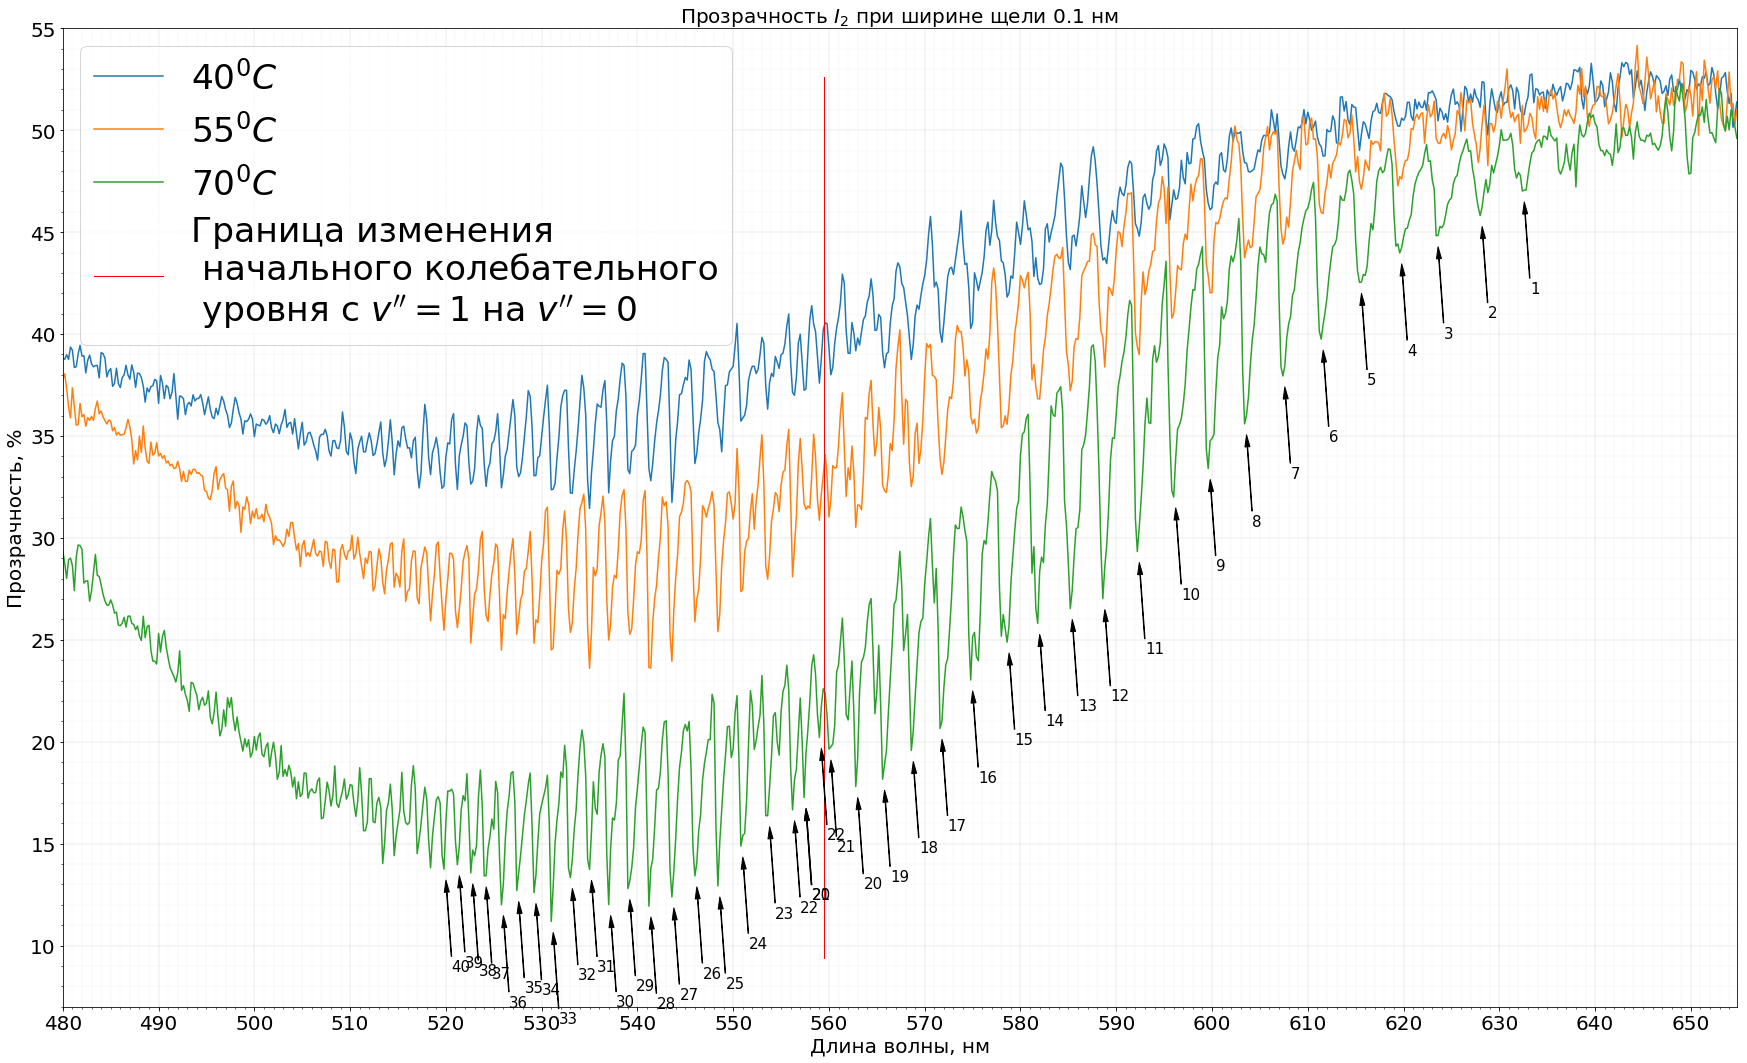

In [13]:
fig = plt.figure()
ax = plt.subplot(111)
df40.plot(x='Wavelength, nm', y='Transmittance, %', ax=ax, label='40$^0C$')
df55.plot(x='Wavelength, nm', y='Transmittance, %', ax=ax, label='55$^0C$')
df70.plot(x='Wavelength, nm', y='Transmittance, %', ax=ax, label='70$^0C$')
ax.set_xlabel('Длина волны, нм', size=20)
ax.set_ylabel('Прозрачность, %', size=20)
ax.set_title("Прозрачность $I_2$ при ширине щели $0.1$ нм", size=20)
ax.axvline(x=559.5, linewidth=1, ymin=0.05, ymax=0.95, linestyle='-', color='r', label='Граница изменения \n начального колебательного\n уровня c $v^{\prime\prime}=1$ на $v^{\prime\prime}=0$')

xminorLocator = MultipleLocator(1)
yminorLocator = MultipleLocator(1)
xmajorLocator = MultipleLocator(10)
ymajorLocator = MultipleLocator(5)

ax.xaxis.set_minor_locator(xminorLocator)
ax.yaxis.set_minor_locator(yminorLocator)
ax.xaxis.set_major_locator(xmajorLocator)
ax.yaxis.set_major_locator(ymajorLocator)
ax.set_ylim(7,55)

plt.grid(which='major', ls='-', lw=0.1, c='grey')
plt.grid(which='minor', ls='--', lw=0.05, c='grey')
ax.legend(fontsize='xx-large')
j = 1
p = 0
peaks_len = len(peaks)
for i in range(1, peaks_len):
    if j>22 and p==0: 
        j = 20
        p = 1
    #print("{}: {}".format(j, peaks_len-i))
    ax.annotate('%d'%j, xy=(df70.iloc[peaks[peaks_len-i],0]+.2, df70.iloc[peaks[peaks_len-i],1]-.5), 
                xytext=(df70.iloc[peaks[peaks_len-i],0]+0.8, df70.iloc[peaks[peaks_len-i],1]-5), size=15, 
                arrowprops=dict(facecolor='black', shrink=0.01, width=0.5, headwidth=5))
    j+=1

fig.set_size_inches(30, 18)
fig.savefig('main_spectrum.pdf', bbox_inches='tight', pad_inches=0)

In [14]:
peaks_idxs_from0 = np.extract(peaks<382, peaks)
peaks_idxs_from0

array([192, 199, 206, 213, 220, 229, 237, 246, 255, 265, 275, 285, 295,
       306, 318, 330, 342, 354, 368, 381], dtype=int64)

In [15]:
peaks_idxs_from1 = np.extract(peaks>382, peaks)
peaks_idxs_from1

array([387, 387, 395, 400, 414, 428, 443, 458, 474, 493, 509, 526, 543,
       561, 580, 598, 617, 637, 657, 677, 698, 717, 740, 762], dtype=int64)

In [16]:
jump0 = (df70.iloc[peaks_idxs_from0[1:],0].as_matrix())**(-1)-(df70.iloc[peaks_idxs_from0[:-1],0].as_matrix())**(-1)
jump0 = (-np.flip(jump0)*10**7)[:-1]
jump0

c:\users\aleks\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


array([84.43962229, 91.82649724, 79.45474973, 80.15325302, 80.86100801,
       81.57817882, 75.41819389, 69.0982335 , 69.61485581, 70.13729375,
       70.66563495, 64.05575413, 64.49299477, 57.69780285, 65.33120015,
       51.12429631, 51.39894717, 51.67581722])

In [17]:
v__ = np.array([i+20 for i in range(len(jump0))])+1

In [18]:
slope, intercept, r_value, p_value, std_err = linregress(v__, jump0)
print("slope: %f    intercept: %f" % (slope, intercept))

slope: -2.140752    intercept: 133.097993


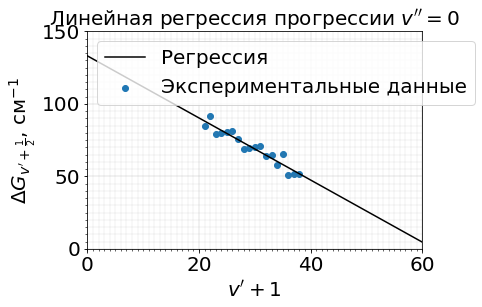

In [19]:
plt.scatter(v__, jump0, label='Экспериментальные данные')
plt.ylabel(r'$\Delta G_{v^{\prime}+\frac{1}{2}}$, см$^{-1}$', size=20)
plt.xlabel(r'$v^{\prime}+1$', size=20)
x_lim = (0, 60)
x = np.linspace(*x_lim, 500)
y = slope*x+intercept

plt.plot(x, y, label='Регрессия', c='black')
plt.title(r'Линейная регрессия прогрессии $v^{\prime\prime}=0$', size=20)

xminorLocator = MultipleLocator(1)
yminorLocator = MultipleLocator(5)
plt.gca().xaxis.set_minor_locator(xminorLocator)
plt.gca().yaxis.set_minor_locator(yminorLocator)
plt.grid(which='major', c='grey', lw=0.1)
plt.grid(which='minor', c='grey', lw=0.1)

plt.legend()
plt.xlim(x_lim)
plt.ylim(0,150)
plt.rcParams["figure.figsize"] = [15,10]
plt.savefig('deltaG(v_0).pdf', bbox_inches='tight', pad_inches=0)

In [20]:
jump1 = (df70.iloc[peaks_idxs_from1[1:],0].as_matrix())**(-1)-(df70.iloc[peaks_idxs_from1[:-1],0].as_matrix())**(-1)
jump1 = (-np.flip(jump1)*10**7)[:-1]
jump1

c:\users\aleks\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


array([110.79015539, 117.49824774,  98.37967637, 110.14895706,
       106.31072136, 107.71092843, 109.13898184, 105.03079835,
       100.73829981, 107.66360902, 103.2794318 ,  98.70845216,
        99.86214325,  95.06000485, 114.25847094,  97.39597258,
        92.30435231,  93.28353568,  87.96188787,  88.84150675,
        31.94479939,  51.35009015])

In [21]:
# Костыль. Выкинем два последних значения
jump1 = jump1[:-2]

In [22]:
v_ = np.array([i+1 for i in range(len(jump1))])+1
v_

array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21])

In [23]:
from scipy.stats import linregress

slope, intercept, r_value, p_value, std_err = linregress(v_, jump1)
print("slope: %f    intercept: %f" % (slope, intercept))

slope: -1.053811    intercept: 114.337133


In [24]:
np.corrcoef(v__, jump0)

array([[ 1.        , -0.95452264],
       [-0.95452264,  1.        ]])

In [25]:
np.corrcoef(v_, jump1)

array([[ 1.        , -0.74856782],
       [-0.74856782,  1.        ]])

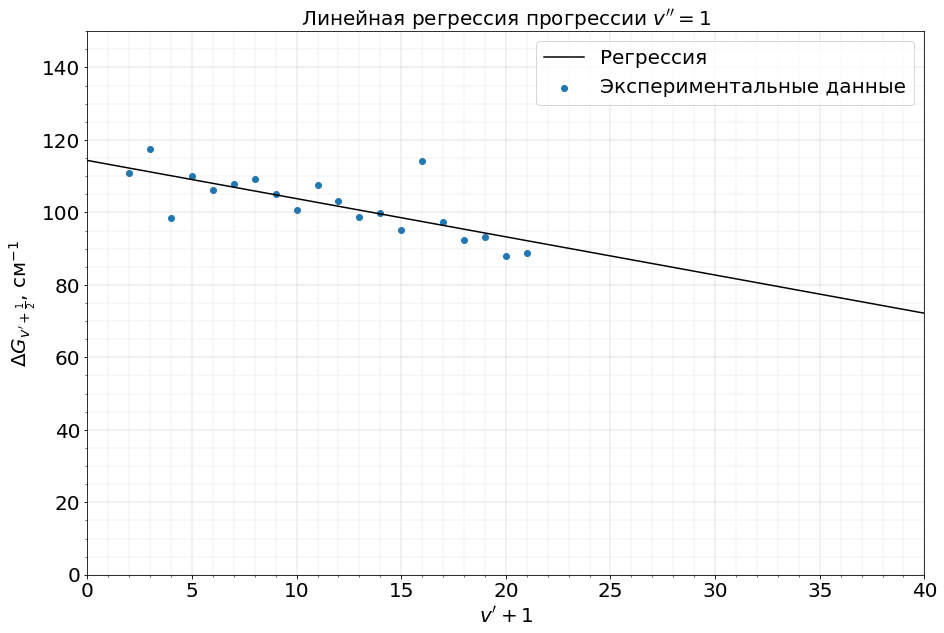

In [26]:
plt.scatter(v_, jump1, label='Экспериментальные данные')
plt.ylabel(r'$\Delta G_{v^{\prime}+\frac{1}{2}}$, см$^{-1}$', size=20)
plt.xlabel(r'$v^{\prime}+1$', size=20)
x = np.linspace(0, 40, 500)
y = slope*x+intercept
plt.plot(x, y, label='Регрессия', c='black')
plt.title(r'Линейная регрессия прогрессии $v^{\prime\prime}=1$', size=20)

xminorLocator = MultipleLocator(1)
yminorLocator = MultipleLocator(5)
plt.gca().xaxis.set_minor_locator(xminorLocator)
plt.gca().yaxis.set_minor_locator(yminorLocator)
plt.grid(which='major', c='grey', lw=0.1)
plt.grid(which='minor', c='grey', lw=0.1)

plt.legend()
plt.xlim(0,40)
plt.ylim(0,150)
plt.rcParams["figure.figsize"] = [15,10]
plt.savefig('deltaG(v_1).pdf', bbox_inches='tight', pad_inches=0)

In [27]:
nu_1 = (df70.iloc[peaks_idxs_from1,0].as_matrix())**(-1)*10**7
nu_1 = np.flip(nu_1)+1.5*130
nu_1

c:\users\aleks\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


array([16007.77672359, 16118.56687898, 16236.06512672, 16334.4448031 ,
       16444.59376016, 16550.90448152, 16658.61540994, 16767.75439178,
       16872.78519013, 16973.52348993, 17081.18709895, 17184.46653075,
       17283.17498291, 17383.03712616, 17478.09713101, 17592.35560195,
       17689.75157453, 17782.05592684, 17875.33946252, 17963.30135039,
       18052.14285714, 18084.08765653, 18135.43774668, 18135.43774668])

In [28]:
v_ = np.array([i+1/2 for i in range(len(nu_1))])+1
v_

array([ 1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5, 11.5,
       12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5, 22.5,
       23.5, 24.5])

In [29]:
degs = np.polyfit(v_, nu_1, deg=2)
degs

array([-1.08284444e+00,  1.25902649e+02,  1.57933569e+04])

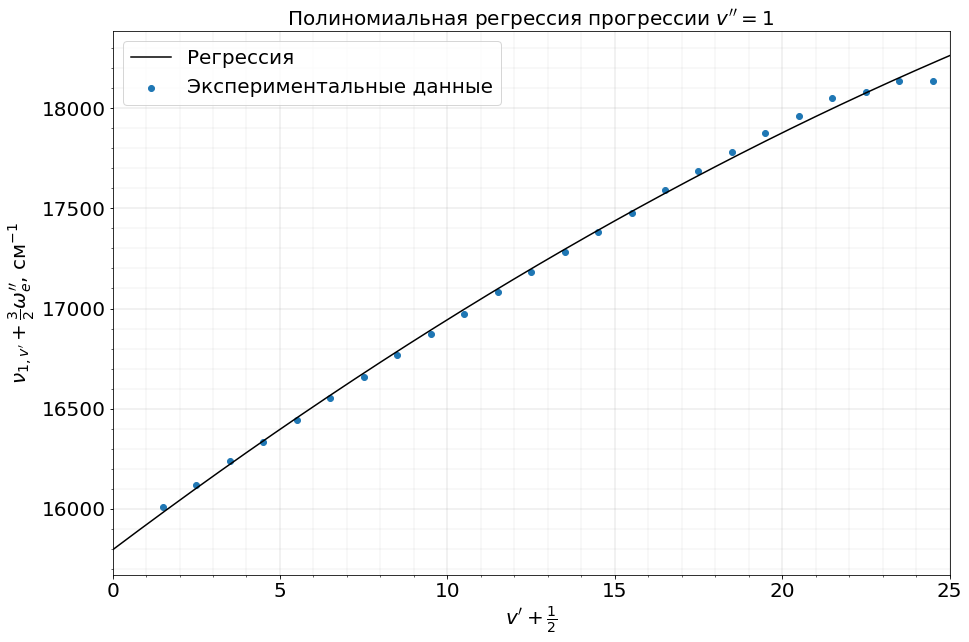

In [30]:
# Хе-хе, выкинем две последние точки при построении
#nu_1 = nu_1[:-2]
#v_ = v_[:-2]

plt.scatter(v_, nu_1, label='Экспериментальные данные')
plt.ylabel(r'$\nu_{1,v^{\prime}}+\frac{3}{2}\omega_e^{\prime\prime}}$, см$^{-1}$', size=20)
plt.xlabel(r'$v^{\prime}+\frac{1}{2}$', size=20)
x = np.linspace(0, 25, 500)
y = degs[0]*x**2+degs[1]*x+degs[2]
plt.plot(x, y, label='Регрессия', c='black')
plt.title(r'Полиномиальная регрессия прогрессии $v^{\prime\prime}=1$', size=20)

xminorLocator = MultipleLocator(1)
yminorLocator = MultipleLocator(100)
plt.gca().xaxis.set_minor_locator(xminorLocator)
plt.gca().yaxis.set_minor_locator(yminorLocator)
plt.grid(which='major', c='grey', lw=0.1)
plt.grid(which='minor', c='grey', lw=0.1)

plt.legend()
plt.xlim(0,25)
plt.rcParams["figure.figsize"] = [15,10]
plt.savefig('parabola_half_1.pdf', bbox_inches='tight', pad_inches=0)

In [31]:
nu_0 = (df70.iloc[peaks_idxs_from0,0].as_matrix())**(-1)*10**7
nu_0 = np.flip(nu_0)+0.5*130
nu_0

c:\users\aleks\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


array([18044.14419274, 18128.58381503, 18220.41031227, 18299.865062  ,
       18380.01831502, 18460.87932303, 18542.45750185, 18617.87569573,
       18686.97392924, 18756.58878505, 18826.7260788 , 18897.39171375,
       18961.44746788, 19025.94046265, 19083.6382655 , 19148.96946565,
       19200.09376196, 19251.49270913, 19303.16852636, 19355.12345679])

In [32]:
v__ = np.array([i+20+1/2 for i in range(len(nu_0))])
v__

array([20.5, 21.5, 22.5, 23.5, 24.5, 25.5, 26.5, 27.5, 28.5, 29.5, 30.5,
       31.5, 32.5, 33.5, 34.5, 35.5, 36.5, 37.5, 38.5, 39.5])

In [33]:
degs = np.polyfit(v__, nu_0, deg=2)
degs

array([-1.06279926e+00,  1.32875233e+02,  1.57651899e+04])

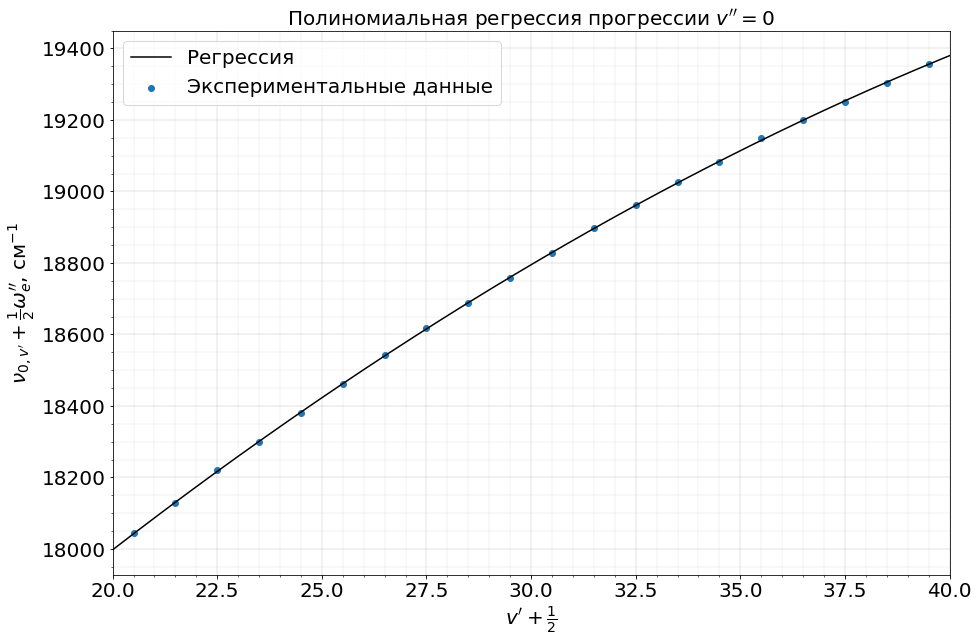

In [34]:
plt.scatter(v__, nu_0, label='Экспериментальные данные')
plt.ylabel(r'$\nu_{0,v^{\prime}}+\frac{1}{2}\omega_e^{\prime\prime}}$, см$^{-1}$', size=20)
plt.xlabel(r'$v^{\prime}+\frac{1}{2}$', size=20)
x = np.linspace(20, 40, 500)
y = degs[0]*x**2+degs[1]*x+degs[2]
plt.plot(x, y, label='Регрессия', c='black')
plt.title(r'Полиномиальная регрессия прогрессии $v^{\prime\prime}=0$', size=20)

xminorLocator = MultipleLocator(0.5)
yminorLocator = MultipleLocator(50)
plt.gca().xaxis.set_minor_locator(xminorLocator)
plt.gca().yaxis.set_minor_locator(yminorLocator)
plt.grid(which='major', c='grey', lw=0.1)
plt.grid(which='minor', c='grey', lw=0.1)

plt.legend()
plt.xlim(20,40)
plt.rcParams["figure.figsize"] = [15,10]
plt.savefig('parabola_half_0.pdf', bbox_inches='tight', pad_inches=0)

In [35]:
dnu = nu_0[1:]-nu_0[:-1]
dnu = dnu[:-1].copy()
dnu

array([84.43962229, 91.82649724, 79.45474973, 80.15325302, 80.86100801,
       81.57817882, 75.41819389, 69.0982335 , 69.61485581, 70.13729375,
       70.66563495, 64.05575413, 64.49299477, 57.69780285, 65.33120015,
       51.12429631, 51.39894717, 51.67581722])

In [36]:
degs = np.polyfit(dnu, nu_0[:-2], deg=2)
degs

array([-1.75905803e-01, -5.87557673e+00,  1.99916970e+04])

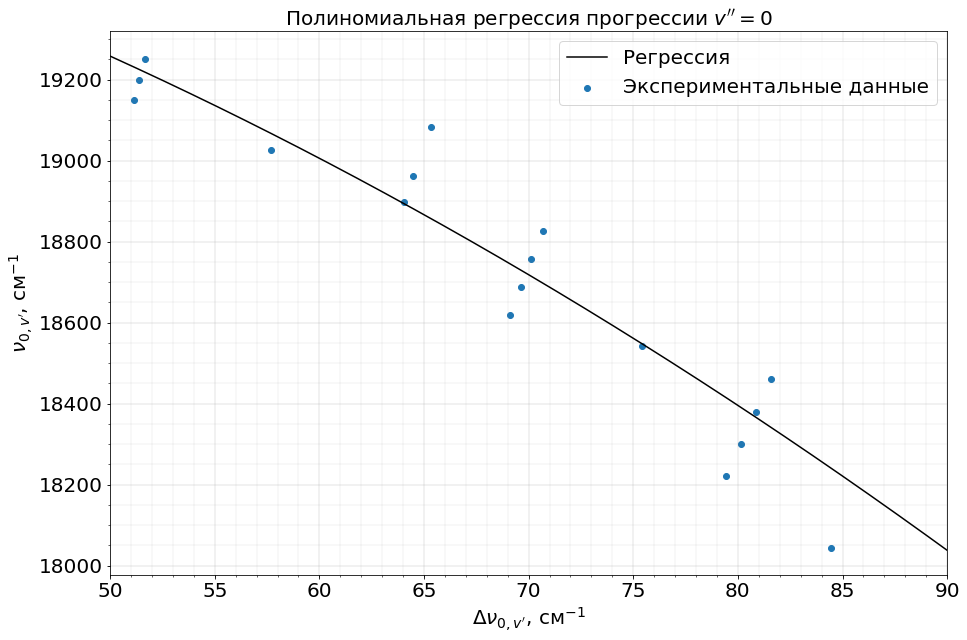

In [37]:
plt.scatter(dnu, nu_0[:-2], label='Экспериментальные данные')
plt.ylabel(r'$\nu_{0,v^{\prime}}$, см$^{-1}$', size=20)
plt.xlabel(r'$\Delta\nu_{0,v^{\prime}}$, см$^{-1}$', size=20)
x = np.linspace(50, 90, 500)
y = degs[0]*x**2+degs[1]*x+degs[2]
plt.plot(x, y, label='Регрессия', c='black')
plt.title(r'Полиномиальная регрессия прогрессии $v^{\prime\prime}=0$', size=20)

xminorLocator = MultipleLocator(1)
yminorLocator = MultipleLocator(50)
plt.gca().xaxis.set_minor_locator(xminorLocator)
plt.gca().yaxis.set_minor_locator(yminorLocator)
plt.grid(which='major', c='grey', lw=0.1)
plt.grid(which='minor', c='grey', lw=0.1)

plt.legend()
plt.xlim(50, 90)
plt.rcParams["figure.figsize"] = [15,10]
plt.savefig('delta_nu.pdf', bbox_inches='tight', pad_inches=0)

In [38]:
jump0 = (df70.iloc[peaks_idxs_from0[1:],0].as_matrix())**(-1)-(df70.iloc[peaks_idxs_from0[:-1],0].as_matrix())**(-1)
jump0 = (-np.flip(jump0)*10**7)[:-1]
jump0

c:\users\aleks\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


array([84.43962229, 91.82649724, 79.45474973, 80.15325302, 80.86100801,
       81.57817882, 75.41819389, 69.0982335 , 69.61485581, 70.13729375,
       70.66563495, 64.05575413, 64.49299477, 57.69780285, 65.33120015,
       51.12429631, 51.39894717, 51.67581722])

In [39]:
v__ = np.array([i+20 for i in range(len(jump0))])+1/2
v__

array([20.5, 21.5, 22.5, 23.5, 24.5, 25.5, 26.5, 27.5, 28.5, 29.5, 30.5,
       31.5, 32.5, 33.5, 34.5, 35.5, 36.5, 37.5])

In [40]:
degs = np.polyfit(v__, jump0, deg=2)
degs

array([-2.55215212e-02, -6.60504199e-01,  1.11250972e+02])

In [41]:
import scipy

In [42]:
results = scipy.integrate.quad(lambda x: degs[0]*x**2+degs[1]*x+degs[2], 0, 59.2)
results

(3663.619589584814, 4.16132522018742e-11)

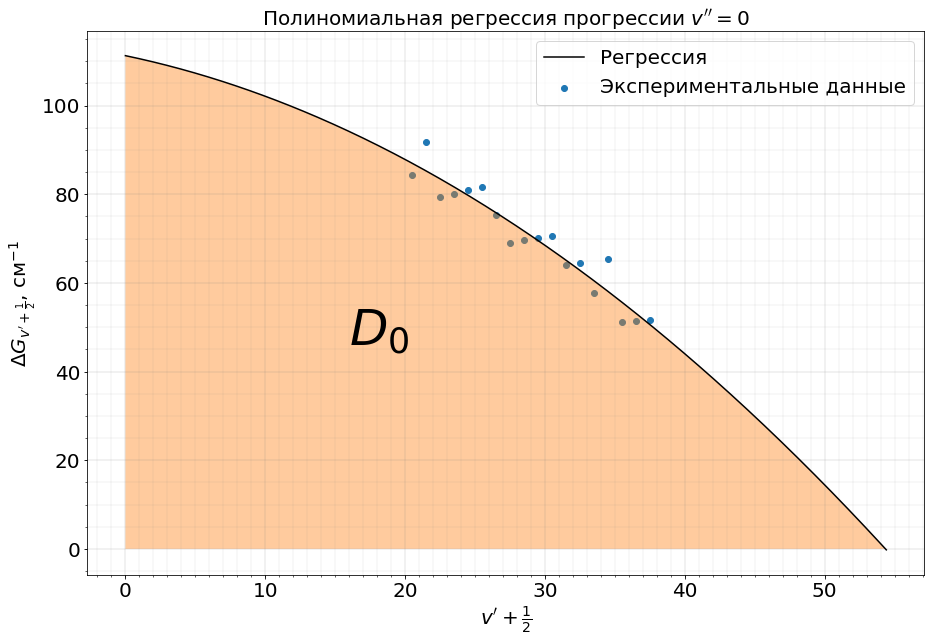

In [43]:
plt.scatter(v__, jump0, label='Экспериментальные данные')
plt.ylabel(r'$\Delta G_{v^{\prime}+\frac{1}{2}}$, см$^{-1}$', size=20)
plt.xlabel(r'$v^{\prime}+\frac{1}{2}}$', size=20)
x = np.linspace(0, 54.4, 500)
y = degs[0]*x**2+degs[1]*x+degs[2]
plt.fill_between(x,y, alpha=0.4)
plt.plot(x, y, label='Регрессия', c='black')
plt.title(r'Полиномиальная регрессия прогрессии $v^{\prime\prime}=0$', size=20)

xminorLocator = MultipleLocator(1)
yminorLocator = MultipleLocator(5)
plt.gca().xaxis.set_minor_locator(xminorLocator)
plt.gca().yaxis.set_minor_locator(yminorLocator)
plt.grid(which='major', c='grey', lw=0.1)
plt.grid(which='minor', c='grey', lw=0.1)

plt.text(16, 46,'$D_0$', size=50)
plt.legend()
plt.rcParams["figure.figsize"] = [15,10]
plt.savefig('deltaG_half_berdg.pdf', bbox_inches='tight', pad_inches=0)

In [44]:
x = np.linspace(2.45, 6, 500)
y = 0.527*(1-np.exp(-2*(x-2.825)))**2
y_d = np.zeros_like(x)+0.527*1.002

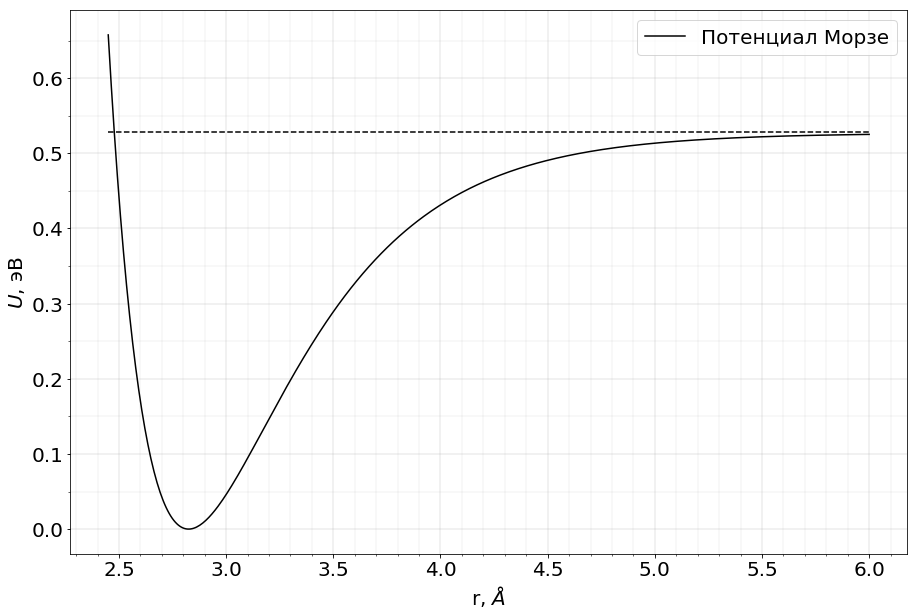

In [45]:
plt.plot(x,y, label='Потенциал Морзе', c='black')
plt.plot(x, y_d, color='k', linestyle='--')
plt.legend()

xminorLocator = MultipleLocator(.1)
yminorLocator = MultipleLocator(.05)
plt.gca().xaxis.set_minor_locator(xminorLocator)
plt.gca().yaxis.set_minor_locator(yminorLocator)
plt.grid(which='major', c='grey', lw=0.1)
plt.grid(which='minor', c='grey', lw=0.1)

plt.xlabel(r'r, $\AA$',size=20)
plt.ylabel(r'$U$, эВ',size=20)
plt.savefig('morse.pdf', bbox_inches='tight', pad_inches=0)
plt.show()

In [46]:
df70_wide = get_spectrum('70_380_700_01.dat')
df70.head()

,"Wavelength, nm","Transmittance, %"
1,480.0,29.374289
2,480.2,28.741954
3,480.4,28.015455
4,480.6,28.935649
5,480.8,29.009641


In [47]:
peaks, _ = find_peaks(-df70_wide.iloc[:,1], distance=2.8, width=0.5, prominence=2.7)
peaks.sort()
peaks = peaks[50:].copy()
#peaks = np.extract(peaks!=387, peaks)
peaks = np.append(np.append(peaks, 1509), 1527)
peaks

array([ 943,  950,  958,  965,  973,  982,  991, 1000, 1009, 1019, 1029,
       1040, 1051, 1062, 1074, 1086, 1099, 1112, 1125, 1139, 1145, 1159,
       1173, 1188, 1203, 1219, 1235, 1254, 1270, 1287, 1305, 1324, 1342,
       1362, 1381, 1401, 1422, 1443, 1462, 1485, 1509, 1527], dtype=int64)

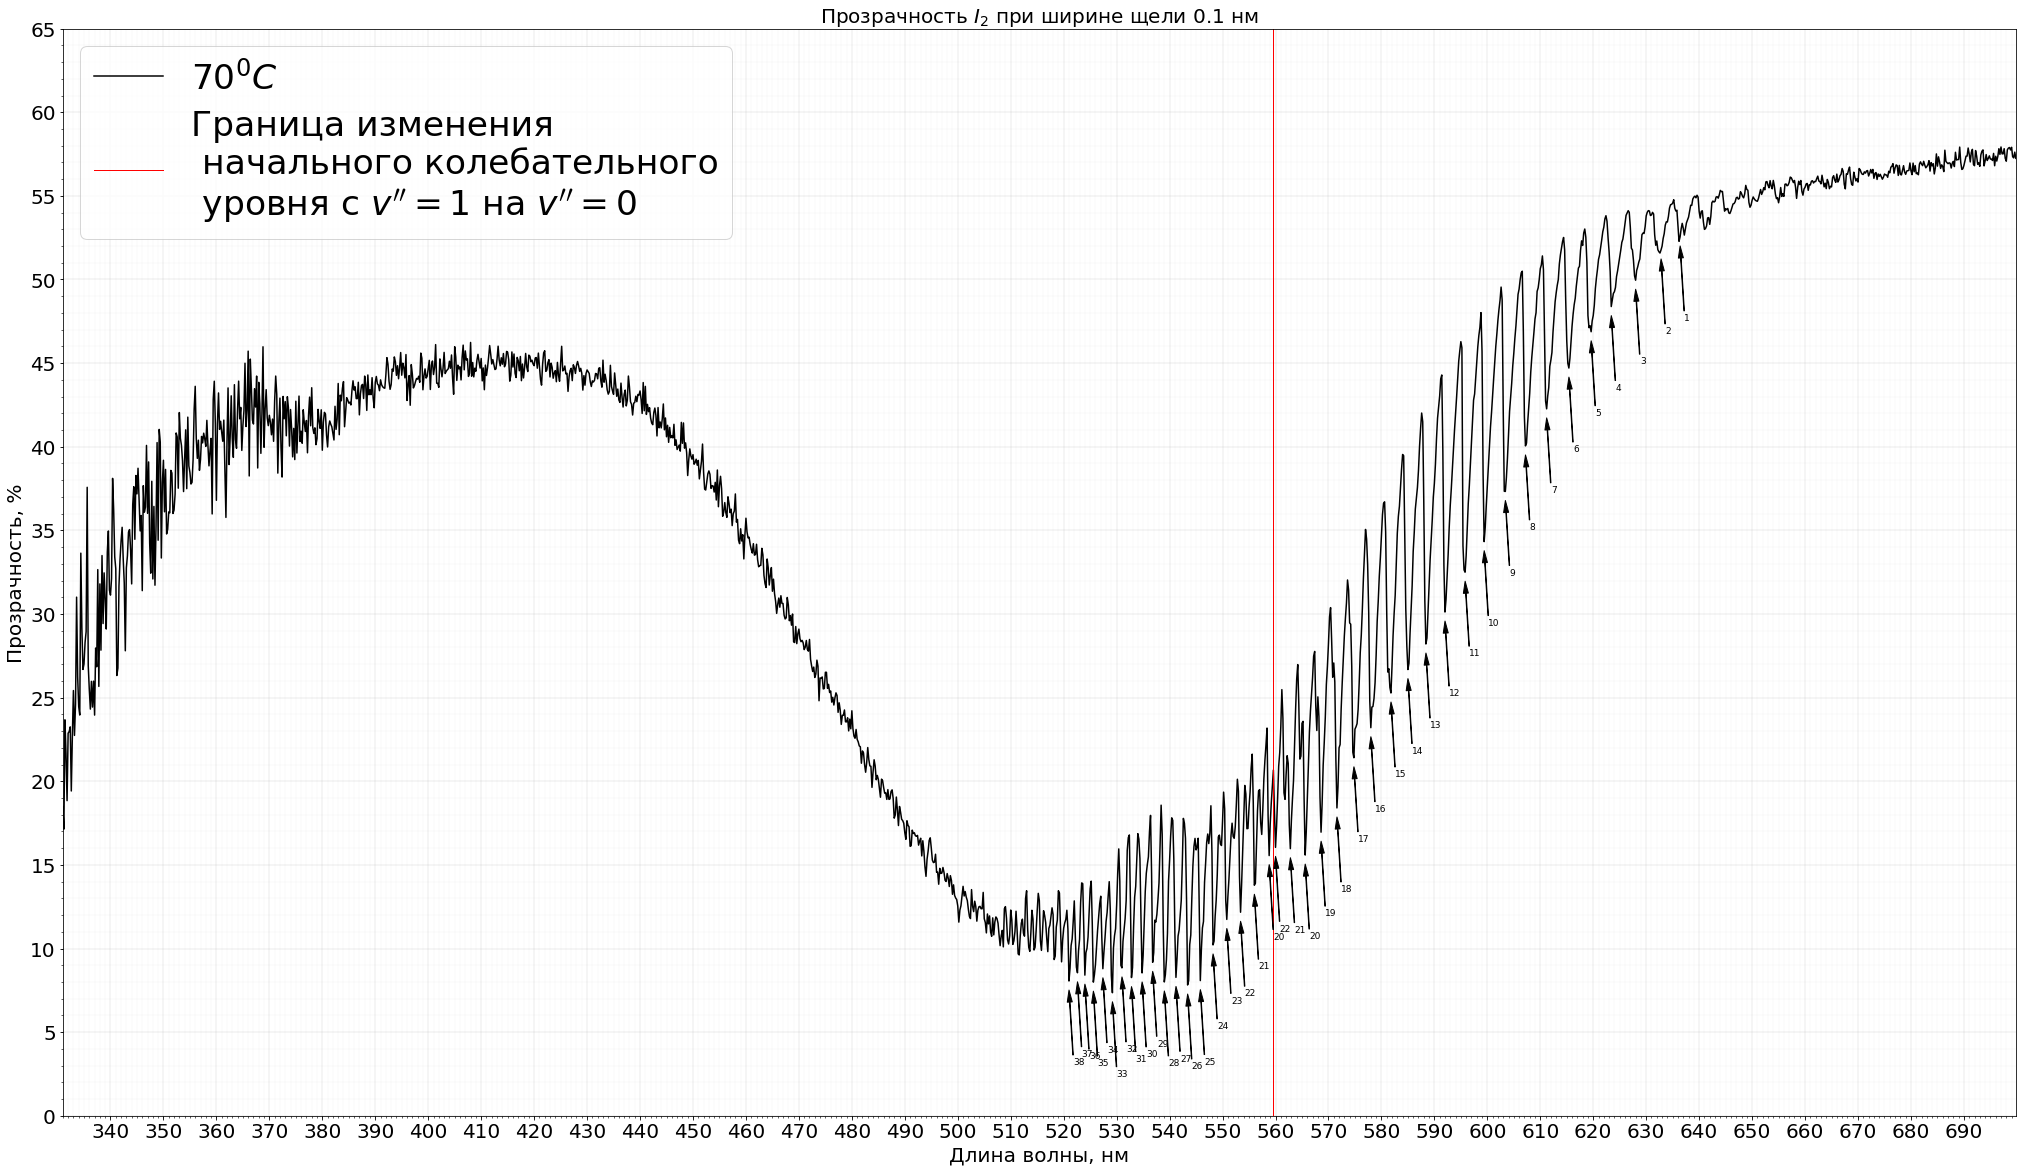

In [48]:
fig = plt.figure()
ax = plt.subplot(111)
df70_wide.plot(x='Wavelength, nm', y='Transmittance, %', ax=ax, label='70$^0C$', c='black')
ax.set_xlabel('Длина волны, нм', size=20)
ax.set_ylabel('Прозрачность, %', size=20)
ax.set_title("Прозрачность $I_2$ при ширине щели $0.1$ нм", size=20)
ax.axvline(x=559.5, linewidth=1, ymin=0.00, ymax=1.00, linestyle='-', color='r', label='Граница изменения \n начального колебательного\n уровня c $v^{\prime\prime}=1$ на $v^{\prime\prime}=0$')

xminorLocator = MultipleLocator(1)
yminorLocator = MultipleLocator(1)
xmajorLocator = MultipleLocator(10)
ymajorLocator = MultipleLocator(5)

ax.xaxis.set_minor_locator(xminorLocator)
ax.yaxis.set_minor_locator(yminorLocator)
ax.xaxis.set_major_locator(xmajorLocator)
ax.yaxis.set_major_locator(ymajorLocator)
ax.set_ylim(0,65)

plt.grid(which='major', ls='-', lw=0.1, c='grey')
plt.grid(which='minor', ls='--', lw=0.05, c='grey')
ax.legend(fontsize='xx-large')
j = 1
p = 0
peaks_len = len(peaks)
for i in range(1, peaks_len):
    if j>22 and p==0: 
        j = 20
        p = 1
    ax.annotate('%d'%j, xy=(df70_wide.iloc[peaks[peaks_len-i],0], df70_wide.iloc[peaks[peaks_len-i],1]-.5), 
                xytext=(df70_wide.iloc[peaks[peaks_len-i],0]+0.8, df70_wide.iloc[peaks[peaks_len-i],1]-5), size=9, 
                arrowprops=dict(facecolor='black', shrink=0.01, width=0.5, headwidth=5))
    j+=1
fig.set_size_inches(35, 20)
fig.savefig('long_spectrum.pdf', bbox_inches='tight', pad_inches=0)

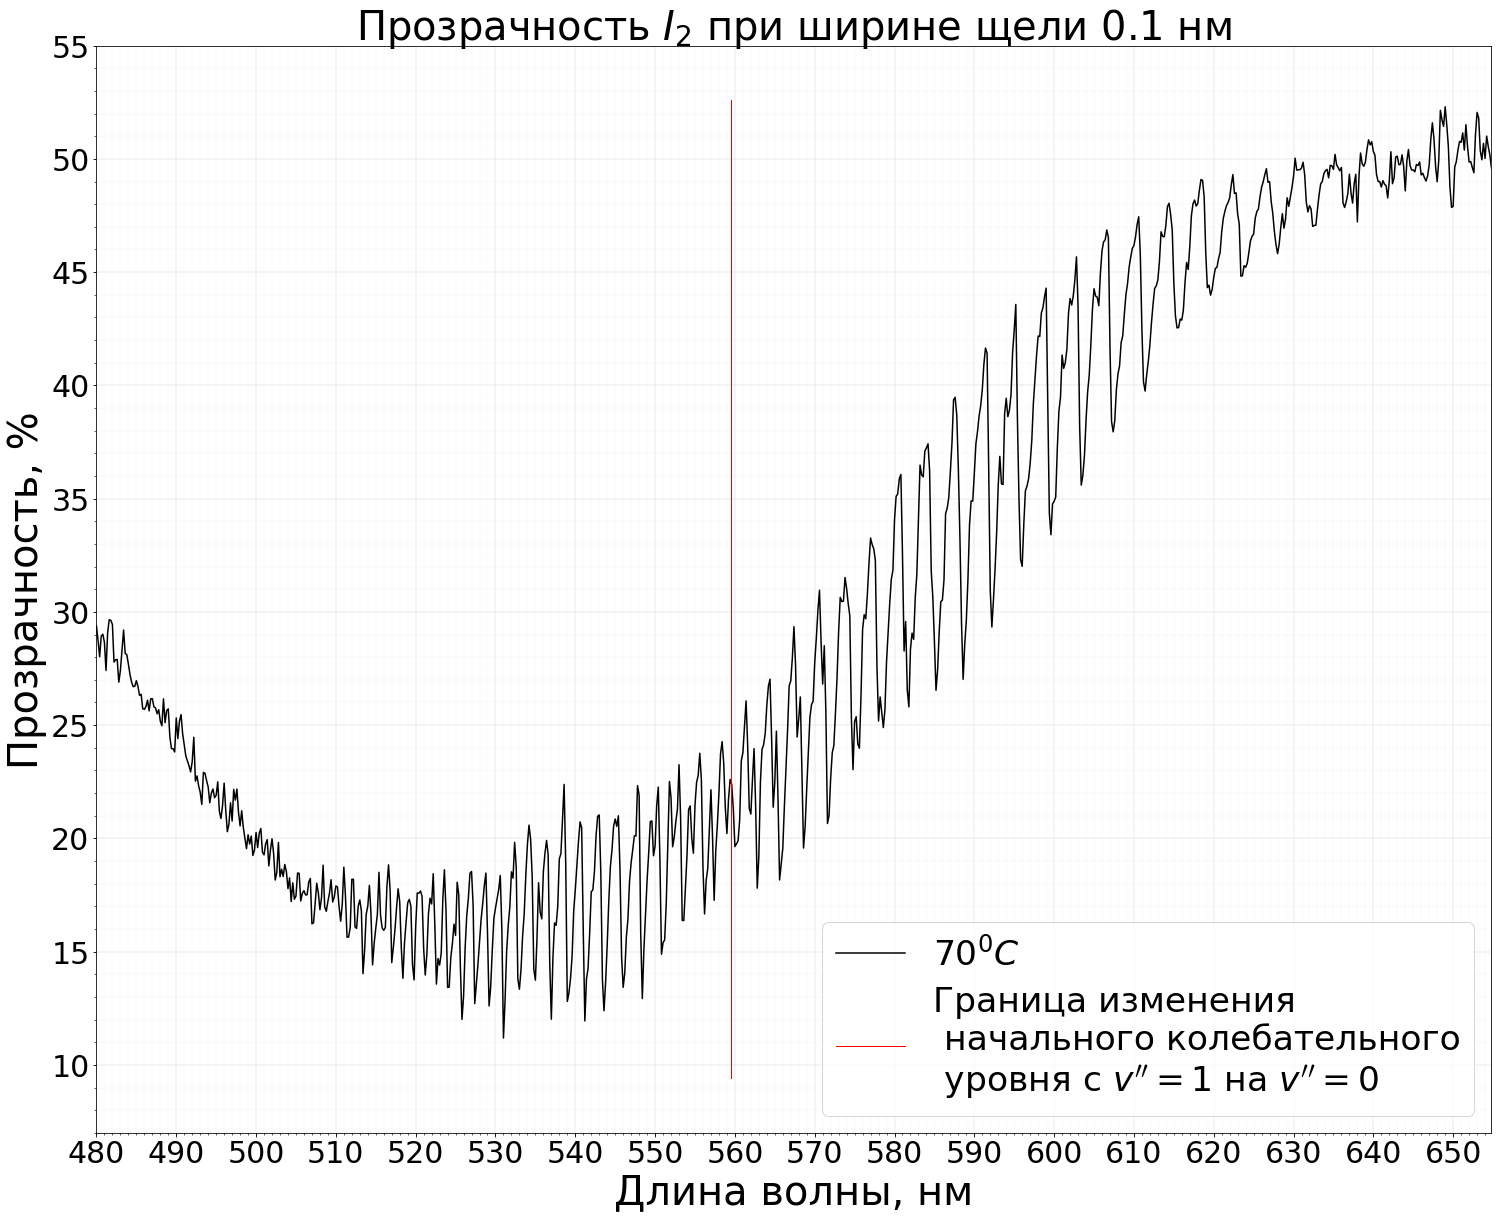

In [49]:
df = get_spectrum('70_480_655_01.dat')
fig = plt.figure()
ax = plt.subplot(111)
df.plot(x='Wavelength, nm', y='Transmittance, %', ax=ax, label='70$^0C$', c='black')
ax.set_xlabel('Длина волны, нм', size=40)
ax.set_ylabel('Прозрачность, %', size=40)
ax.set_title("Прозрачность $I_2$ при ширине щели $0.1$ нм", size=40)
ax.axvline(x=559.5, linewidth=1, ymin=0.05, ymax=0.95, linestyle='-', color='r', label='Граница изменения \n начального колебательного\n уровня c $v^{\prime\prime}=1$ на $v^{\prime\prime}=0$')

xminorLocator = MultipleLocator(1)
yminorLocator = MultipleLocator(1)
xmajorLocator = MultipleLocator(10)
ymajorLocator = MultipleLocator(5)
#xminorLocator.set_params(color='red')

ax.xaxis.set_minor_locator(xminorLocator)
ax.yaxis.set_minor_locator(yminorLocator)
ax.xaxis.set_major_locator(xmajorLocator)
ax.yaxis.set_major_locator(ymajorLocator)
ax.set_ylim(7,55)

plt.grid(which='major', ls='-', lw=0.1, c='grey')
plt.grid(which='minor', ls='--', lw=0.05, c='grey')
ax.legend(fontsize='xx-large')

ax.tick_params(labelsize=30)

peaks_len = len(peaks)
fig.set_size_inches(25, 20)
fig.savefig('absorption_spectrum_slit_01.pdf', bbox_inches='tight', pad_inches=0)

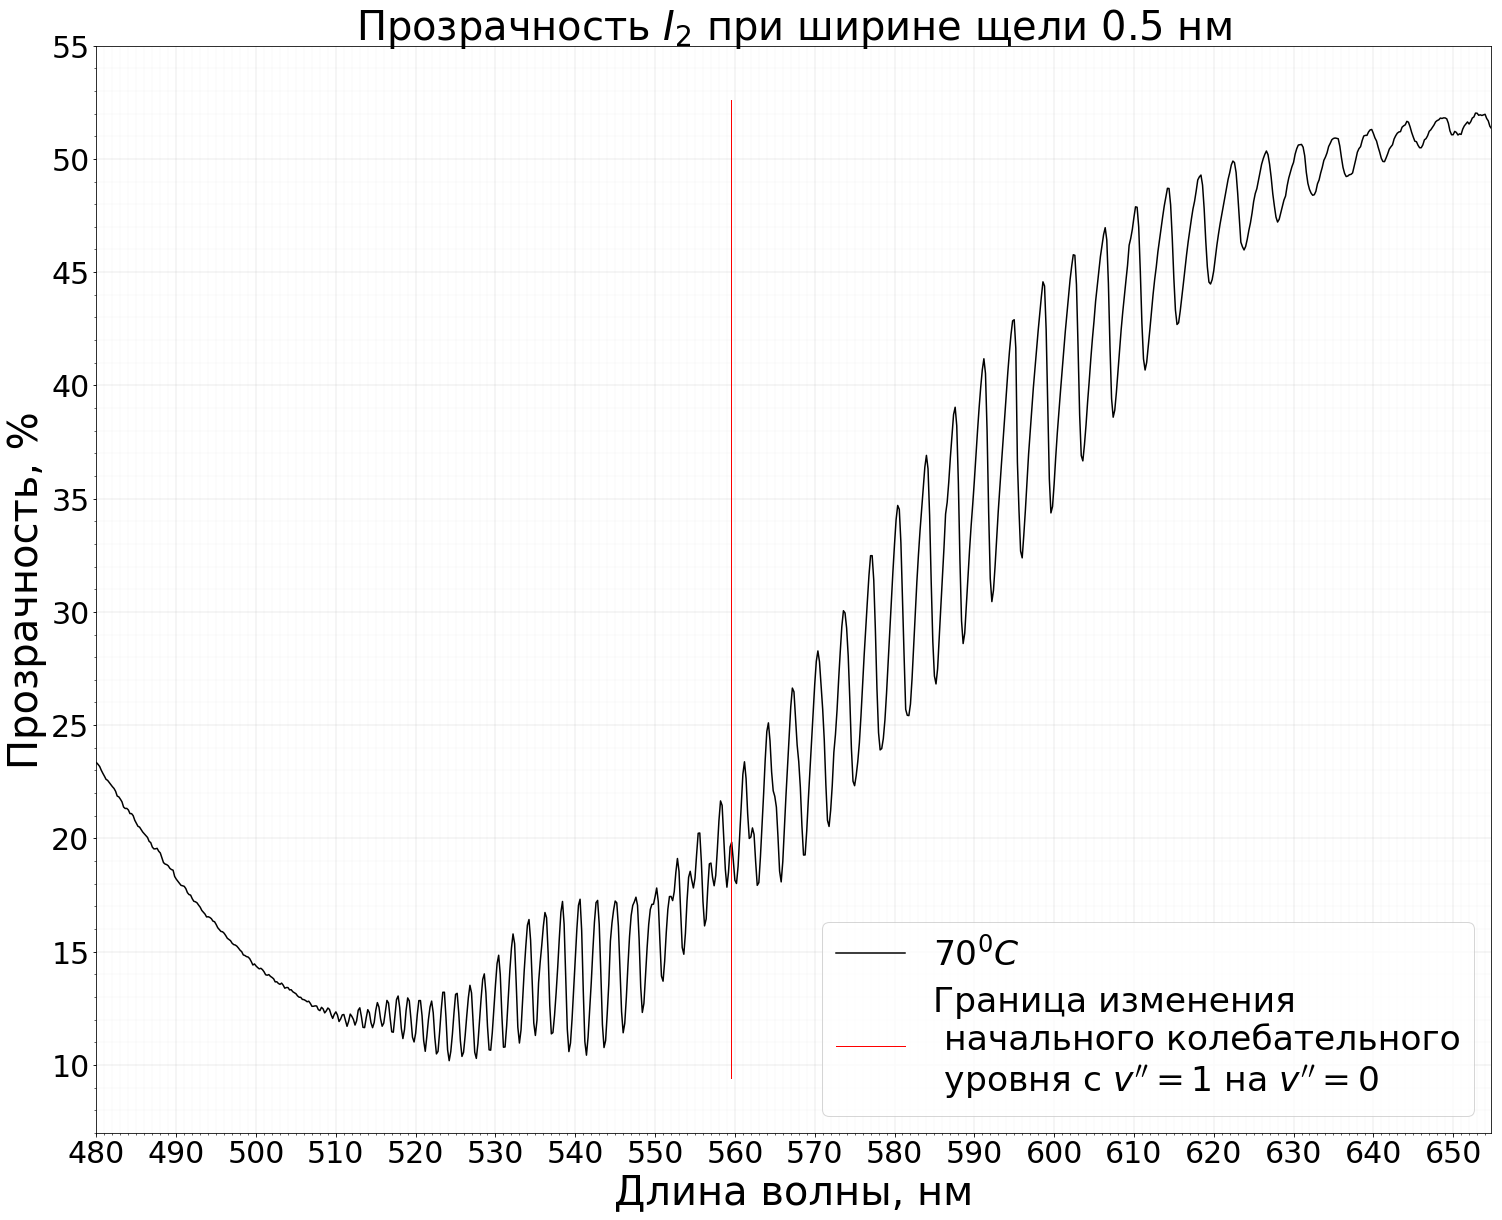

In [50]:
df = get_spectrum('70_480_655_05.dat')
fig = plt.figure()
ax = plt.subplot(111)
df.plot(x='Wavelength, nm', y='Transmittance, %', ax=ax, label='70$^0C$', c='black')
ax.set_xlabel('Длина волны, нм', size=40)
ax.set_ylabel('Прозрачность, %', size=40)
ax.set_title("Прозрачность $I_2$ при ширине щели $0.5$ нм", size=40)
ax.axvline(x=559.5, linewidth=1, ymin=0.05, ymax=0.95, linestyle='-', color='r', label='Граница изменения \n начального колебательного\n уровня c $v^{\prime\prime}=1$ на $v^{\prime\prime}=0$')

xminorLocator = MultipleLocator(1)
yminorLocator = MultipleLocator(1)
xmajorLocator = MultipleLocator(10)
ymajorLocator = MultipleLocator(5)

ax.xaxis.set_minor_locator(xminorLocator)
ax.yaxis.set_minor_locator(yminorLocator)
ax.xaxis.set_major_locator(xmajorLocator)
ax.yaxis.set_major_locator(ymajorLocator)
ax.set_ylim(7,55)

plt.grid(which='major', ls='-', lw=0.1, c='grey')
plt.grid(which='minor', ls='--', lw=0.05, c='grey')
ax.legend(fontsize='xx-large')

ax.tick_params(labelsize=30)

peaks_len = len(peaks)
fig.set_size_inches(25, 20)
fig.savefig('absorption_spectrum_slit_05.pdf', bbox_inches='tight', pad_inches=0)

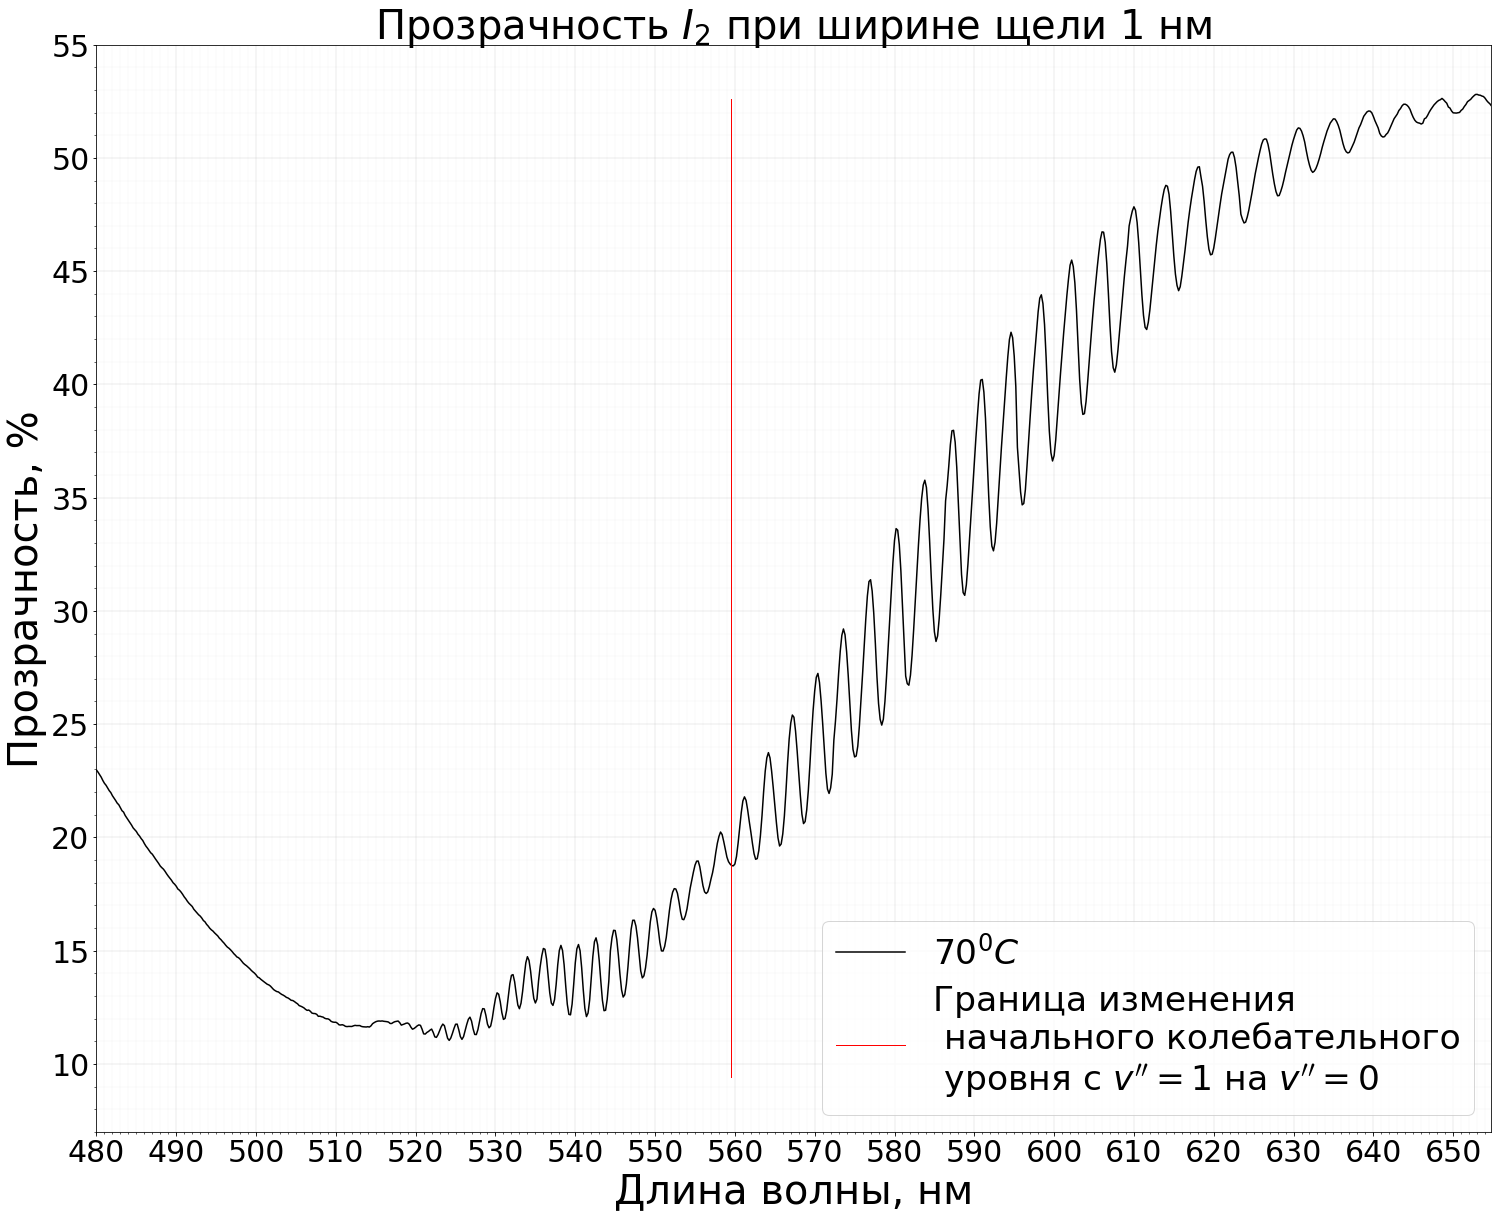

In [51]:
df = get_spectrum('70_480_655_1.dat')
fig = plt.figure()
ax = plt.subplot(111)
df.plot(x='Wavelength, nm', y='Transmittance, %', ax=ax, label='70$^0C$', c='black')
ax.set_xlabel('Длина волны, нм', size=40)
ax.set_ylabel('Прозрачность, %', size=40)
ax.set_title("Прозрачность $I_2$ при ширине щели $1$ нм", size=40)
ax.axvline(x=559.5, linewidth=1, ymin=0.05, ymax=0.95, linestyle='-', color='r', label='Граница изменения \n начального колебательного\n уровня c $v^{\prime\prime}=1$ на $v^{\prime\prime}=0$')

xminorLocator = MultipleLocator(1)
yminorLocator = MultipleLocator(1)
xmajorLocator = MultipleLocator(10)
ymajorLocator = MultipleLocator(5)

ax.xaxis.set_minor_locator(xminorLocator)
ax.yaxis.set_minor_locator(yminorLocator)
ax.xaxis.set_major_locator(xmajorLocator)
ax.yaxis.set_major_locator(ymajorLocator)
ax.set_ylim(7,55)

plt.grid(which='major', ls='-', lw=0.1, c='grey')
plt.grid(which='minor', ls='--', lw=0.05, c='grey')
ax.legend(fontsize='xx-large')

ax.tick_params(labelsize=30)

peaks_len = len(peaks)
fig.set_size_inches(25, 20)
fig.savefig('absorption_spectrum_slit_1.pdf', bbox_inches='tight', pad_inches=0)

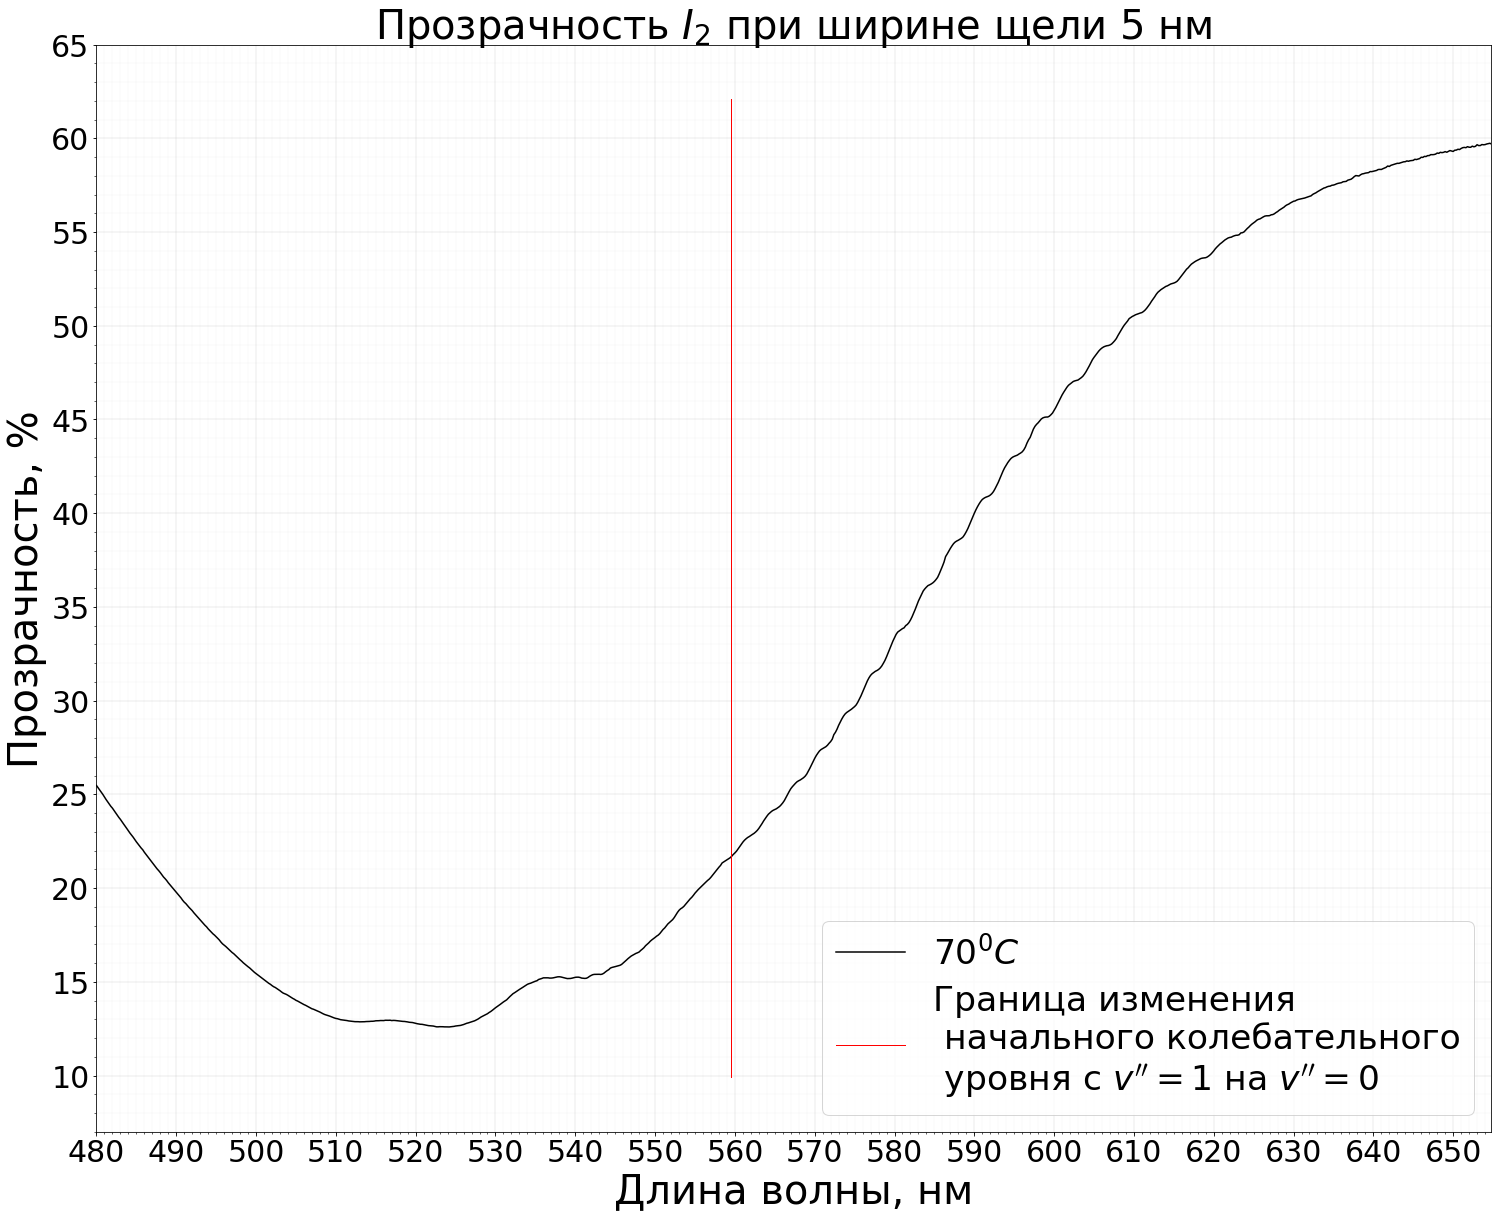

In [52]:
df = get_spectrum('70_480_655_5.dat')
fig = plt.figure()
ax = plt.subplot(111)
df.plot(x='Wavelength, nm', y='Transmittance, %', ax=ax, label='70$^0C$', c='black')
ax.set_xlabel('Длина волны, нм', size=40)
ax.set_ylabel('Прозрачность, %', size=40)
ax.set_title("Прозрачность $I_2$ при ширине щели $5$ нм", size=40)
ax.axvline(x=559.5, linewidth=1, ymin=0.05, ymax=0.95, linestyle='-', color='r', label='Граница изменения \n начального колебательного\n уровня c $v^{\prime\prime}=1$ на $v^{\prime\prime}=0$')

xminorLocator = MultipleLocator(1)
yminorLocator = MultipleLocator(1)
xmajorLocator = MultipleLocator(10)
ymajorLocator = MultipleLocator(5)

ax.xaxis.set_minor_locator(xminorLocator)
ax.yaxis.set_minor_locator(yminorLocator)
ax.xaxis.set_major_locator(xmajorLocator)
ax.yaxis.set_major_locator(ymajorLocator)
ax.set_ylim(7,65)

plt.grid(which='major', ls='-', lw=0.1, c='grey')
plt.grid(which='minor', ls='--', lw=0.05, c='grey')
ax.legend(fontsize='xx-large')

ax.tick_params(labelsize=30)

peaks_len = len(peaks)
fig.set_size_inches(25, 20)
fig.savefig('absorption_spectrum_slit_5.pdf', bbox_inches='tight', pad_inches=0)